# Analysis of prior literature

Here, we look into CCAs reported in the literature. We analyze sample-size dependence of reported association strengths and estimate the corresopnding weight errors.

## Setup

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

from sklearn.linear_model import LinearRegression

from gemmr.metrics import mk_weightError
from gemmr.data import load_outcomes, print_ds_stats, load_metaanalysis, load_metaanalysis_outcomes

import holoviews as hv
from holoviews import opts, dim
hv.extension('matplotlib')
hv.renderer('matplotlib').param.set_param(dpi=120)

from my_config import *

import warnings
# holoviews emits this for log-linear plots
warnings.filterwarnings(
    'ignore', 'aspect is not supported for Axes with xscale=log, yscale=linear', category=UserWarning
) 
warnings.filterwarnings(
    'ignore', 'aspect is not supported for Axes with xscale=linear, yscale=log', category=UserWarning
)  

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# This will be populated below and then written to disk
plotted_data = {}

## CCAs in literature

In [3]:
metaanalysis_data = load_metaanalysis()

In [4]:
metaanalysis_data.columns

Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI',
       'CCA variant', 'n', 'n unit', 'subject_groups', 'is_healthy', 'dataset',
       'n_sites', 'brain-behavior association', 'X modality', 'Y modality',
       'pX', 'pY', 'Comment', 'latent association stengths reported', 'r1'],
      dtype='object')

We're extracting studies that used CCA to analyze brain-behavior relationships, and reported the used sample size, the number of features in the data and the estimated canonical correlation

In [5]:
def try_float(r):
    try:
        return float(r)
    except:
        return np.nan
    
    
cond_cca_bba = (
    (metaanalysis_data['CCA variant'] == 'CCA') & 
    (metaanalysis_data['brain-behavior association'] == 'yes')
)
cond_npr = (
    np.isfinite(metaanalysis_data['n'].apply(try_float)) &
    np.isfinite(metaanalysis_data['pX'].apply(try_float)) &
    np.isfinite(metaanalysis_data['pY'].apply(try_float)) &
    np.isfinite(metaanalysis_data['r1'].apply(try_float))
)


metaanalysis_data_ = metaanalysis_data[cond_cca_bba & cond_npr].copy()
metaanalysis_data_.loc[:, 'r1'] = metaanalysis_data_['r1'].astype(float)
metaanalysis_data_.loc[:, 'pX'] = metaanalysis_data_['pX'].astype(int)
metaanalysis_data_.loc[:, 'pY'] = metaanalysis_data_['pY'].astype(int)
metaanalysis_data_.loc[:, 'n'] = metaanalysis_data_['n'].astype(int)

assert len(metaanalysis_data_['DOI']) == len(metaanalysis_data_['DOI'].dropna())

How popular has CCA been in the brain-behavior literature over time? For this analysis only we consider all CCA studies, independent of if they reported sample size, number of features and canonical correlation.

:Histogram   [Year]   (Num CCA studies of
brain behavior associations)
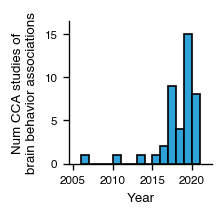

In [6]:
pub_years = metaanalysis_data[cond_cca_bba]['Publication Year'].groupby(metaanalysis_data[cond_cca_bba]['DOI']).mean().values
hist, edges = np.histogram(pub_years, bins=np.arange(pub_years.min(), pub_years.max()+2))
panel_nCCAStudies_by_year = hv.Histogram(
    (edges, hist)
).redim(
    x='Year',
    Frequency='Num CCA studies of\nbrain behavior associations'
).opts(*fig_opts).opts(
    opts.Histogram(fig_inches=(1.7, None))
)

hv.save(panel_nCCAStudies_by_year, 'fig/figS_nCCAStudies_by_year.pdf')

panel_nCCAStudies_by_year

From here on, we only consider studies that *do* report sample size, number of features and canonical correlation. How many are there?

In [7]:
print('n_publications =', len(metaanalysis_data_['DOI'].unique()))
print('n_CCAs =', len(metaanalysis_data_))

n_publications = 31
n_CCAs = 100


Let's see how many samples per feature studies typically use (if a publication reports several CCAs with the same number of samples and the same number of features for both datasets we count it as one here)

:Histogram   [Samples per feature]   (Num. reported CCAs)
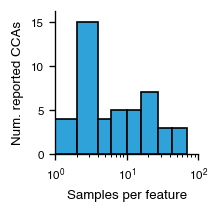

In [8]:
n_per_ftrs = []
for doi, df in metaanalysis_data_.groupby('DOI'):
    n_per_ftrs += (df['n'] / (df['pX'] + df['pY'])).unique().tolist()
n_per_ftrs = np.array(n_per_ftrs)

# # Alternatively, count each reported CCA, even if it there are multiple ones from the same study
# # with the same number of samples and the same number of features in both datasets
# n_per_ftrs = (metaanalysis_data_['n'] / (metaanalysis_data_['pX'] + metaanalysis_data_['pY']))

log_n_per_ftrs = np.log(n_per_ftrs)

bins = np.sort(list(set(np.logspace(0, log_n_per_ftrs.max()*1.01, 10, base=np.exp(1), dtype=int).tolist())))
bins = np.log(bins)
counts, bins = np.histogram(log_n_per_ftrs, bins=bins, density=False)
bins = np.exp(bins)

panel_n_per_ftr_hist = hv.Histogram(
    ((bins, counts))
).redim(
    x='Samples per feature',
    Frequency='Num. reported CCAs'
).opts(*fig_opts).opts(
    opts.Histogram(logx=True, fig_inches=(1.7, None), xlim=(1, 100)),
)

# hv.save(panel_n_per_ftr_hist, 'fig/figS_metaanalysis_n_per_ftr_histogram.pdf')

panel_n_per_ftr_hist

Let's also see how the reported canonical correlations relate to the samples-per-feature of the used data:

:Overlay
   .Scatter.I  :Scatter   [Samples per feature]   (Canonical corr.)
   .Scatter.II :Scatter   [Samples per feature]   (Canonical corr.)
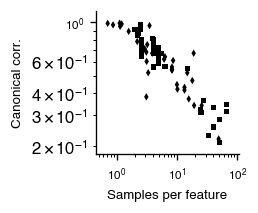

In [9]:
def is_healthy_marker(s):
    if s == 'yes':
        return 's'
    # elif s == 'no':
    #     return 'x'
    else:
        return 'd'
marker = metaanalysis_data_['is_healthy'].apply(is_healthy_marker)

metaanalysis_n_per_ftr = (metaanalysis_data_['n'].astype(float) / (metaanalysis_data_['pX'].astype(float) + metaanalysis_data_['pY'].astype(float)))

panel_metaanalysis_rObs_nPerFtr = hv.Overlay()
for my_marker in np.unique(marker):
    mask = (marker == my_marker)
    panel_metaanalysis_rObs_nPerFtr *= hv.Scatter(
        (metaanalysis_n_per_ftr[mask], metaanalysis_data_['r1'][mask]),
        kdims=['Samples per feature'],
        vdims='Canonical corr.',
        # label='Literature',
    ).opts(*fig_opts).opts(
        logx=True, logy=True, color='black', s=10, fig_inches=(1.7, None), marker=my_marker
    )

# save plotted data
_plotted_data = pd.DataFrame(
    metaanalysis_data_['r1'][mask].values,
    index=metaanalysis_n_per_ftr[mask].values
)
_plotted_data.columns = ['r']
_plotted_data.index.names = ['n_per_ftr']
plotted_data['CCAs_in_literature'] = _plotted_data

panel_metaanalysis_rObs_nPerFtr.opts(*fig_opts).opts(
    fig_inches=(1.7, None)
)

This looks pretty linear. What's the corresponding $R^2$ value?

In [10]:
X = np.log(metaanalysis_n_per_ftr.values.reshape(-1, 1))
y = np.log(metaanalysis_data_['r1'].values)

lm = LinearRegression(fit_intercept=True).fit(X, y)
log_nPerFtr_obsCorr_R2 = lm.score(X, y)
log_nPerFtr_obsCorr_R2

0.833416333963024

## What's the relation between canonical correlation and samples per feature in synthetic data with known true correlation?

In [11]:
data_home = None
ds_cca = load_outcomes('sweep_cca_cca_0+0_litanaDenseSweep', data_home=data_home)

Loading data from subfolder 'gemmr_latest'


What's in the simulated outcome data file?

In [12]:
print_ds_stats(ds_cca)

n_modes		 1
n_rep		 100
n_perm		 10
n_per_ftr	 [  3   4   6   8  12  16  24  32  48  64  96 100]
r		 [0.1 0.3 0.5]
px		 [  2   4   8  16  32  64 128]
ax+ay range	(0.00, 0.00)
py		== px

<xarray.DataArray 'n_Sigmas' (px: 7, r: 3)>
array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10],
       [10, 10, 10],
       [10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]])
Coordinates:
  * r        (r) float64 0.1 0.3 0.5
  * px       (px) int64 2 4 8 16 32 64 128

power		not calculated


What's the relation between observed canonical correlation and samples per feature in synthetic data?

:Overlay
   .Curve.Perm                   :Curve   [Samples per feature]   (Observed correlation)
   .Curve.R_equals_0_full_stop_1 :Curve   [Samples per feature]   (Observed correlation)
   .Curve.R_equals_0_full_stop_3 :Curve   [Samples per feature]   (Observed correlation)
   .Curve.R_equals_0_full_stop_5 :Curve   [Samples per feature]   (Observed correlation)
   .Text.I                       :Text   [Samples per feature,Observed correlation]
   .Text.II                      :Text   [Samples per feature,Observed correlation]
   .Text.III                     :Text   [Samples per feature,Observed correlation]
   .Text.IV                      :Text   [Samples per feature,Observed correlation]
   .Text.V                       :Text   [Samples per feature,Observed correlation]
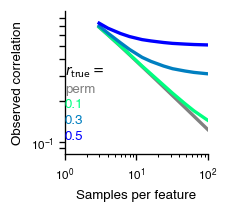

In [13]:
panel_synthetic = hv.Overlay()
_r_clrs = ['grey'] + hv.Palette(cmap_r, samples=3).values

_plotted_data = {}

_ds_perm = ds_cca.between_assocs_perm \
    .mean('perm').mean('rep').mean('px').mean('Sigma_id').mean('r')
_plotted_data['perm'] = _ds_perm.to_dataframe()['between_assocs_perm']
panel_synthetic *= hv.Curve(
    (_ds_perm.n_per_ftr, _ds_perm.values), label='perm'
).opts(
    logx=True, logy=True
)

for r in ds_cca.r.values:
    _ds = ds_cca.between_assocs.sel(r=r).mean('rep').mean('px').mean('Sigma_id')
    _plotted_data[r] = _ds.drop('r').to_dataframe()['between_assocs']
    panel_synthetic *= hv.Curve(
        (_ds.n_per_ftr, _ds.values), 
        label='$r=%.1f$' % r
    ).opts(
        logx=True, logy=True
    )
    
# save plotted data
_plotted_data = pd.concat(_plotted_data, axis=1)
_plotted_data.columns.names = ['r_true']
plotted_data['simulated_observed_correlations'] = _plotted_data

    
panel_synthetic *= hv.Text(1, 0.1, '0.5', halign='left', valign='bottom', fontsize=8).opts(color=_r_clrs[-1])
panel_synthetic *= hv.Text(1, 0.1*1.3, '0.3', halign='left', valign='bottom', fontsize=8).opts(color=_r_clrs[-2])
panel_synthetic *= hv.Text(1, 0.1*1.3*1.3, '0.1', halign='left', valign='bottom', fontsize=8).opts(color=_r_clrs[-3])
panel_synthetic *= hv.Text(1, 0.1*1.3*1.3*1.3, 'perm', halign='left', valign='bottom', fontsize=8).opts(color=_r_clrs[-4])
panel_synthetic *= hv.Text(1, 0.1*1.3*1.3*1.3*1.3, '$r_\mathrm{true}=$', halign='left', valign='bottom', fontsize=8)

panel_synthetic = panel_synthetic.redim(
    x='Samples per feature',
    y='Observed correlation'
).opts(*fig_opts).opts(
    opts.Curve(color=hv.Cycle(_r_clrs)),
    opts.Overlay(logx=True, logy=True, show_legend=False, fig_inches=(1.7, None), yticks=3),
)
panel_synthetic

Now, let's compare literature to synthetic data

:Overlay
   .Curve.Perm                   :Curve   [Samples per feature]   (Observed correlation)
   .Curve.R_equals_0_full_stop_1 :Curve   [Samples per feature]   (Observed correlation)
   .Curve.R_equals_0_full_stop_3 :Curve   [Samples per feature]   (Observed correlation)
   .Curve.R_equals_0_full_stop_5 :Curve   [Samples per feature]   (Observed correlation)
   .Text.I                       :Text   [Samples per feature,Observed correlation]
   .Text.II                      :Text   [Samples per feature,Observed correlation]
   .Text.III                     :Text   [Samples per feature,Observed correlation]
   .Text.IV                      :Text   [Samples per feature,Observed correlation]
   .Text.V                       :Text   [Samples per feature,Observed correlation]
   .Scatter.I                    :Scatter   [Samples per feature]   (Canonical corr.)
   .Scatter.II                   :Scatter   [Samples per feature]   (Canonical corr.)
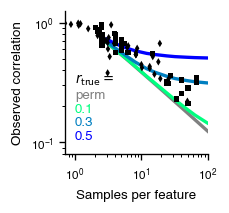

In [14]:
fig = panel_synthetic * panel_metaanalysis_rObs_nPerFtr
fig.opts(*fig_opts).opts(fig_inches=(1.7, None), show_legend=False)

## Estimate weight errors for reported CCAs

To estimate the weight errors for a reported CCA we use the number of features of the reported CCA, repeatedly generate synthetic data of the same sample size as the reported CCA, and sweep through the assumed true correlations. For each synthetic dataset we perform CCA. Whenever the estimated canonical correlation in the synthetic data matches the reported canonical correlation we calculate and record the weight error in the synthetic dataset. We then use the collection of recorded synthetic weight errors as an estimate for the weight error in the reported CCA.

![title](docfig/figS_metaanalysis_estimated_weight_error.png)

Following the description above, we have generate synthetic data for each combination of $p_X, p_Y$ and $n$ in our database and analyzed it with *gemmr*. The resulting datasets look, for example, like this:

In [15]:
print_ds_stats(load_metaanalysis_outcomes(px=8, py=7, n=95, data_home=data_home))

n_modes		 1
n_rep		 100
n_per_ftr	 [6]
r		 [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
px		 [8]
ax+ay range	(0.00, 0.00)
py		!= px

<xarray.DataArray 'n_Sigmas' (px: 1, r: 100)>
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Coordinates:
  

The following piece of code performs the second part of the analysis: it finds synthetic datasets with estimated canonical correlation matching the empirical one and calculates the corresponding weight error in the synthetic dataset:

In [16]:
def get_error(n, px, py, target_corr, calc_error_fun=mk_weightError, error_kind=.975,
              corr_bw=0.1, qs=(.025, .5, .975), verbose=False):
    
    if (px == 1) or (py == 1):
        return np.nan
    
    ds = load_metaanalysis_outcomes(px, py, n)

    corr_cond = np.abs(ds.between_assocs / target_corr - 1) < corr_bw
    if corr_cond.sum() == 0:
        return np.nan
    
    if verbose:
        print(n, px, py, target_corr, 'n_corr_cond =', int(corr_cond.sum()))

    error = calc_error_fun(ds)
    conditional_error = error.where(corr_cond)
    
    if error_kind == 'distribution':
        return conditional_error
    
    else:
        error_stats = xr.concat([
            conditional_error.quantile(qs),
            xr.DataArray([conditional_error.mean()], dims=('quantile',), coords=dict(quantile=['mean'])),
        ],
            'quantile'
        )
        res = error_stats.sel(quantile=error_kind)
        if res.ndim == 0:
            res = float(res)
        return res

In [17]:
weight_errors = [
    get_error(row[1]['n'], row[1]['pX'], row[1]['pY'], row[1]['r1'],
              calc_error_fun=mk_weightError, error_kind='mean')
    for row in metaanalysis_data_.iterrows()
]
metaanalysis_data_['mean_estimated_weight_error'] = weight_errors

Let's overlay the estimated weight errors on the observed-correlation vs samples-per-feature plot:

:Overlay
   .Scatter.I   :Scatter   [Samples per feature]   (Observed correlation,Estim weight error)
   .Scatter.II  :Scatter   [Samples per feature]   (Observed correlation,Estim weight error)
   .Scatter.III :Scatter   [Samples per feature]   (Observed correlation,Estim weight error)
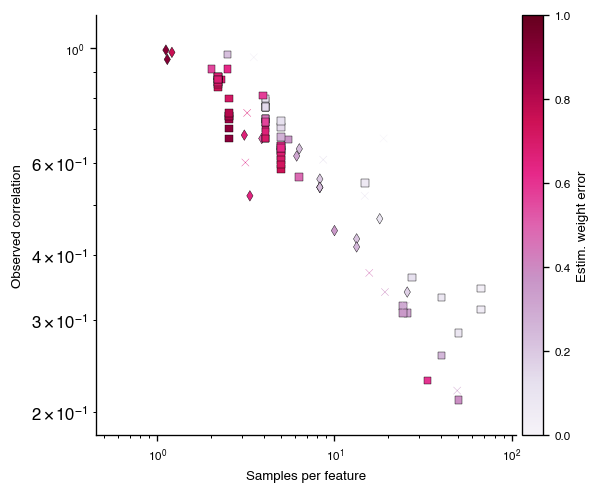

In [18]:
def is_healthy_marker(s):
    if s == 'yes':
        return 's'
    elif s == 'no':
        return 'd'
    else:
        return 'x'
marker = metaanalysis_data_['is_healthy'].apply(is_healthy_marker)

panel_metaanalysis_rObs_nPerFtr = hv.Overlay()
for my_marker in np.unique(marker):
    mask = (marker == my_marker)
    panel_metaanalysis_rObs_nPerFtr *= hv.Scatter(
        (metaanalysis_n_per_ftr[mask], metaanalysis_data_['r1'][mask], 
        metaanalysis_data_['mean_estimated_weight_error'][mask].rename('Estim_weight_error')),
        kdims=['Samples per feature'],
        vdims=['Observed correlation', 'Estim weight error'],
    ).opts(*fig_opts).opts(
        fig_inches=(1.7, None), s=20, edgecolor='black', linewidth=.25, logx=True, logy=True, 
        color=dim('Estim_weight_error'), cmap='PuRd', colorbar=True, clim=(.0, 1), clabel='Estim. weight error', marker=my_marker
    )

panel_metaanalysis_rObs_nPerFtr.opts(*fig_opts).opts(
    fig_inches=(5, None)
)

:Scatter   [Samples per feature]   (Observed correlation,Estim weight error)
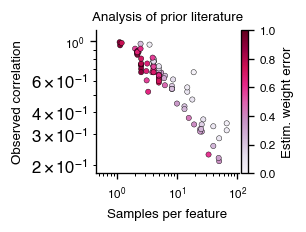

In [19]:
panel_metaanalysis_rObs_nPerFtr = hv.Scatter(
    (metaanalysis_n_per_ftr, metaanalysis_data_['r1'], 
     metaanalysis_data_['mean_estimated_weight_error'].rename('Estim_weight_error')),
    kdims=['Samples per feature'],
    vdims=['Observed correlation', 'Estim weight error'],
    label='Analysis of prior literature',
).opts(*fig_opts).opts(
    fig_inches=(1.7, None), s=10, marker='o', edgecolor='black', linewidth=.25, logx=True, logy=True, 
    color=dim('Estim_weight_error'), cmap='PuRd', colorbar=True, clim=(.0, 1), clabel='Estim. weight error'
)

panel_metaanalysis_rObs_nPerFtr

We're going to look at two more aspects of the estimated weight errors:

* What's the distribution of estimated weight errors for a given reported CCA?
* It appears that the weight errors are smaller the farther a point (i.e. a reported CCA) lies away from the top-left to bottom-right diagonal in the plot. We'll look more closely at this relationship

### Distribution of weight errors

In [20]:
weight_error_distribs = [
    get_error(row[1]['n'], row[1]['pX'], row[1]['pY'], row[1]['r1'],
              calc_error_fun=mk_weightError, error_kind=slice(None), qs=(.025, .975), verbose=True)
    for row in metaanalysis_data_.iterrows()
]

assert isinstance(weight_error_distribs[0], xr.DataArray)
for i in range(len(weight_error_distribs)):
    if not isinstance(weight_error_distribs[i], xr.DataArray):
        weight_error_distribs[i] = xr.full_like(weight_error_distribs[0], np.nan)

80 3 3 0.43 n_corr_cond = 1234
80 5 3 0.446 n_corr_cond = 1599
80 3 3 0.415 n_corr_cond = 1230
449 96 32 0.959 n_corr_cond = 2146
602 9 6 0.257 n_corr_cond = 813
602 9 6 0.332 n_corr_cond = 759
602 12 6 0.23 n_corr_cond = 1270
602 16 6 0.363 n_corr_cond = 872
602 3 6 0.345 n_corr_cond = 745
602 3 6 0.315 n_corr_cond = 644
602 6 6 0.211 n_corr_cond = 776
602 6 6 0.284 n_corr_cond = 673
95 8 7 0.64 n_corr_cond = 2167
95 4 7 0.61 n_corr_cond = 1673
678 68 14 0.54 n_corr_cond = 1761
678 68 14 0.56 n_corr_cond = 1688
678 68 14 0.54 n_corr_cond = 1761
678 68 14 0.54 n_corr_cond = 1761
461 100 100 0.87 n_corr_cond = 9131
183 55 4 0.68 n_corr_cond = 5286
220 176 17 0.95 n_corr_cond = 6158
187 150 17 0.99 n_corr_cond = 5183
7577 200 200 0.67 n_corr_cond = 1484
89 22 22 0.91 n_corr_cond = 9297
818 100 100 0.7 n_corr_cond = 6680
818 100 100 0.77 n_corr_cond = 2729
1094 100 100 0.667 n_corr_cond = 3374
89 4 2 0.52 n_corr_cond = 1206
89 4 2 0.55 n_corr_cond = 1273
440 6 11 0.31 n_corr_cond = 1065
3

In [21]:
e = xr.concat(weight_error_distribs, 'iter')
e = e.sortby(e.sel(quantile='mean'))

error_bars = xr.concat([
    e.iter,
    e.sel(quantile='mean', drop=True),
    e.sel(quantile='mean', drop=True) - e.sel(quantile=.025, drop=True),
    e.sel(quantile=.975, drop=True) - e.sel(quantile='mean', drop=True),
],
    'errorbar_feature',
).T

error_bars = error_bars.assign_coords(errorbar_feature=['i', 'mean', 'upper', 'lower'])

:Overlay
   .ErrorBars.I :ErrorBars   [Reported CCA]   (Estim. weight error,yerrneg,yerrpos)
   .Scatter.I   :Scatter   [Reported CCA]   (Estim. weight error)
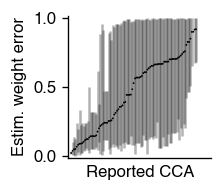

In [22]:
panel_estimated_weight_errors = (
    hv.ErrorBars(error_bars.values, vdims=['y', 'yerrneg', 'yerrpos']) * 
    hv.Scatter(
        (error_bars.sel(errorbar_feature='i'), error_bars.sel(errorbar_feature='mean'))
    )
).redim(
    x='Reported CCA',
    y='Estim. weight error',
).opts(
    opts.ErrorBars(alpha=.3),
    opts.Scatter(s=5, color='black', marker='.'),
    opts.Overlay(xticks=0, padding=0.02, fig_inches=(1.7, None))
)

plotted_data['estimated_weight_errors'] = error_bars.sel(errorbar_feature=['mean', 'upper', 'lower']).to_pandas().dropna(how='all')

panel_estimated_weight_errors

### Relation of weight error to distance from diagonal

As mentioned above, it appears that, in the observed canonical correlation vs samples per features plot, the distance from the top-left-to-bottom-right diagonal is related to the mean estimated weight error. To investigate that let's first fit a linear model to the synthetic permutation data:

Linear model:
intercept: 0.16136524728100143
slope: [-0.49059251]


:Overlay
   .Scatter.I :Scatter   [log(samples per feature)]   (log(observed canonical correlation))
   .Curve.I   :Curve   [log(samples per feature)]   (log(observed canonical correlation))
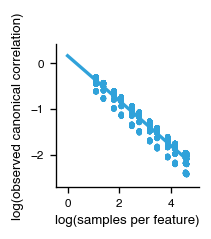

In [23]:
# Fit linear model to (log(n_per_ftr), log(observed correlation)) for permuted data
_ds_perm = ds_cca.between_assocs_perm \
    .mean('perm').mean('rep').stack(it=('Sigma_id', 'px', 'n_per_ftr', 'r'))

X = np.log(_ds_perm.n_per_ftr.values.reshape(-1, 1))
y = np.log(_ds_perm.values)
lm = LinearRegression(fit_intercept=True).fit(X, y)
print('Linear model:')
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)

_test_x = np.array([0, np.log(100)])
(
    hv.Scatter((X[:, 0], y)) 
    * hv.Curve((_test_x, lm.predict(_test_x.reshape(-1, 1))))
).redim(
    x='log(samples per feature)',
    y='log(observed canonical correlation)'
).opts(*fig_opts).opts(
    opts.Scatter(s=10),
    opts.Overlay(fig_inches=(1.7, None))
)

Next, calculate distane from the fitted line 

In [24]:
anchor = np.array([0, lm.intercept_])
v = np.array([1, lm.coef_[0]])

vN = -np.array([lm.coef_[0], -1])
vN = vN / np.linalg.norm(vN)

assert np.dot(v, vN) == 0

print('normal vector:', vN)

###

mask = np.isfinite(metaanalysis_data_['mean_estimated_weight_error'].values)

Xlit = np.log(metaanalysis_n_per_ftr).values.reshape(-1, 1)
ylit = np.log(metaanalysis_data_['r1'].values)
xylit = np.c_[Xlit, ylit.reshape(-1, 1)]
dist_to_null = (xylit - anchor).dot(vN)
len(dist_to_null)

normal vector: [0.44044415 0.89778001]


100

:Scatter   [Distance to perm]   (Mean estimated
weight error)
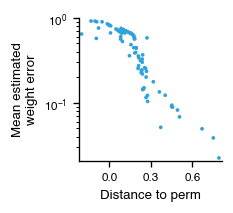

In [25]:
def hook_ticklabelsize(plot, element):
    ax = plot.handles['axis']
    ax.tick_params(axis='both', which='both', labelsize=7)


fig_dist_to_null_weight_error = hv.Scatter(
    (dist_to_null[mask], metaanalysis_data_['mean_estimated_weight_error'].values[mask])
).redim(
    x='Distance to perm',
    y='Mean estimated\nweight error'
).opts(
    *fig_opts
).opts(
    fig_inches=(1.7, None), logx=False, logy=True, ylim=(None, 1), padding=.02, s=5, xticks=4,
    hooks=[hook_ticklabelsize]
)

fig_dist_to_null_weight_error

## Assemble summary figure

:Layout
   .Overlay.I  :Overlay
      .Curve.Perm                           :Curve   [Samples per feature]   (Observed correlation)
      .Curve.R_equals_0_full_stop_1         :Curve   [Samples per feature]   (Observed correlation)
      .Curve.R_equals_0_full_stop_3         :Curve   [Samples per feature]   (Observed correlation)
      .Curve.R_equals_0_full_stop_5         :Curve   [Samples per feature]   (Observed correlation)
      .Text.I                               :Text   [Samples per feature,Observed correlation]
      .Text.II                              :Text   [Samples per feature,Observed correlation]
      .Text.III                             :Text   [Samples per feature,Observed correlation]
      .Text.IV                              :Text   [Samples per feature,Observed correlation]
      .Text.V                               :Text   [Samples per feature,Observed correlation]
      .Scatter.Analysis_of_prior_literature :Scatter   [Samples per feature]   (Observed correlation,Estim weight error)
      .Text.VI                              :Text   [x,y]
      .Text.VII                             :Text   [x,y]
   .Overlay.II :Overlay
      .ErrorBars.I :ErrorBars   [Reported CCA]   (Estim. weight error,yerrneg,yerrpos)
      .Scatter.I   :Scatter   [Reported CCA]   (Estim. weight error)
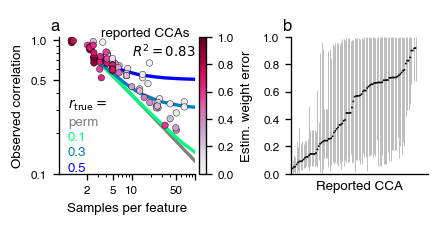

In [26]:
def hook_logy_formatter(plot, element):
    ax = plot.handles['axis']
    
    x_minor_ticks = np.r_[np.arange(3, 10), np.arange(20, 100, 10)]
    ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minor_ticks))
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([2, 5, 10, 50, 100]))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter([2, 5, 10, 50, '']))
    
    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.1f'))
    ax.yaxis.set_minor_formatter(matplotlib.ticker.FixedFormatter(['']*9))
    ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(np.arange(.2, 1.0, .1)))
    ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator([.1, .5, 1]))
    ax.tick_params(axis='y', which='both', labelsize=7)
    
    
def hook_cbar(plot, element):
    fig = plot.handles['fig']
    cbar_ax = fig.axes[-1]
    cbar_ax.yaxis.label.set_fontsize(8)
    cbar_ax.tick_params(axis='y', which='both', labelsize=7)
    
    
fig = (
    (panel_synthetic.opts(show_legend=True)
     * panel_metaanalysis_rObs_nPerFtr.opts(s=15, clim=(0,1))
     * hv.Text(80, 1.25, 'reported CCAs', halign='right', valign='top', fontsize=8)
     * hv.Text(100, .95, '$R^2=%.2f$' % log_nPerFtr_obsCorr_R2, halign='right', valign='top', fontsize=8)
    ).opts(
        show_legend=False, hooks=[hook_logy_formatter, hook_cbar], sublabel_position=(-.17, .92), 
        xlim=(None, None), ylim=(None, 1.05), padding=.0,
    )
    + panel_estimated_weight_errors.opts(opts.Overlay(sublabel_position=(-.17, .92), yticks=6, ylabel='', padding=0, ylim=(0, 1)), 
                                         opts.ErrorBars(linewidth=.5))
).opts(*fig_opts).opts(
    opts.Layout(aspect_weight=1, hspace=.7, fig_inches=(3.42, 3.42/2/1.6*5*1.2), 
                sublabel_size=10), 
)

hv.save(fig, 'fig/fig_metaanalysis.pdf')
save_source_data(plotted_data, 'fig6')

fig

## Supplementary figure

:Layout
   .Histogram.I :Histogram   [Samples per feature]   (Num. reported CCAs)
   .Scatter.I   :Scatter   [Distance to perm]   (Mean estimated
weight error)
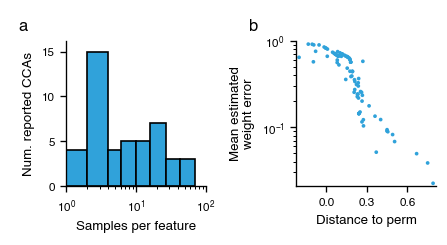

In [27]:
def hook_xticks(plot, element):
    ax = plot.handles['axis']
    ax.xaxis.set_minor_locator(matplotlib.ticker.LogLocator(subs='auto', numticks=5))
    ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
figS = (
    panel_n_per_ftr_hist.opts(hooks=[Format_log_axis('x', major_numticks=4, minor_numticks=5)])
    + fig_dist_to_null_weight_error
).opts(*fig_opts).opts(
    opts.Layout(hspace=.65, sublabel_position=(-.45, .95), fig_inches=(3.42, 1.))
)

hv.save(figS, 'fig/figS_metaanalysis.pdf')

figS